In [137]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("Resources/city_data.csv")
ride_df = pd.read_csv("Resources/ride_data.csv")

# Combine the data into a single dataset
complete_df = pd.merge(ride_df, city_df, on="city", how="outer")

# Display the data table for preview
complete_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [138]:
#filtered data frame of only urban cities & reset indexes
urban_df = complete_df.loc[complete_df["type"] == "Urban",:]
urban_df = urban_df.reset_index(drop=True)

#filtered data frame of only suburban cities & reset indexes
suburban_df = complete_df.loc[complete_df["type"] == "Suburban",:]
suburban_df = suburban_df.reset_index(drop=True)

#filtered data frame of only rural cities & reset indexes
rural_df = complete_df.loc[complete_df["type"] == "Rural",:]
rural_df = rural_df.reset_index(drop=True)
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [139]:
#creating graph for urban
urban_total_rides = [] #creating list for urban total rides
avg_fare_urban = [] #creating list for urban average fare
urban_city = urban_df.city.unique() #list of the urban city names (no repeats)
urban_driver_count = [] #empty list for diver total per city

for i in range(len(urban_city)):
    #using loc it runs through the urban filtered df. 
    #Checks cities against the city in urban city list. calculates the mean of the fares for given city.
    fare = urban_df.loc[urban_df["city"] == urban_city[i], "fare"].mean()
    avg_fare_urban.append(fare) #appends mean for the city to the avg_fare_urban list
    
    #Checks cities against the city in urban city list. Counts the number of times that city appears = number of total rides.
    rides = urban_df.loc[urban_df["city"] == urban_city[i], "city"].count()
    urban_total_rides.append(rides) #appends ride count for the city to the urban_total_rides list
    
    #if row matches the current city looking for returns the value in the driver_count column
    driver_count  = urban_df.loc[urban_df["city"] == urban_city[i], "driver_count"].iloc[4]
    urban_driver_count.append(driver_count) #appends driver_count to list
    
    
#creates dataframe of urban cities, average fare, total rides and driver counts
urban_summary_df = pd.DataFrame({"Urban Cities": urban_city, "Average Fare ($)": avg_fare_urban, 
                                 "Total Number of Rides (Per City)": urban_total_rides,"Driver Count": urban_driver_count})
urban_summary_df = urban_summary_df.round(2) #rounds the data to two decimal places
urban_summary_df.head() #prints first five lines

,Urban Cities,Average Fare ($),Total Number of Rides (Per City),Driver Count
0,Lake Jonathanshire,23.43,24,5
1,South Michelleport,24.45,31,72
2,Port Samanthamouth,25.64,25,57
3,Rodneyfort,28.62,23,34
4,South Jack,22.97,19,46


(0, 40)

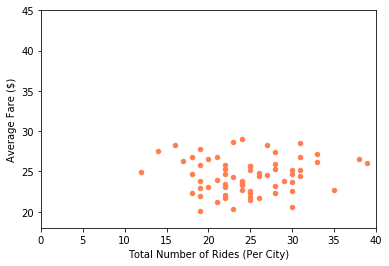

In [140]:
#graphs urban_summary_df as a scatter plot
urban_chart = urban_summary_df.plot(kind='scatter', x="Total Number of Rides (Per City)", y="Average Fare ($)", c="Coral")
plt.ylim(18, 45)
plt.xlim(0,40)

In [141]:
#creating graph for suburban
suburban_total_rides = [] #creating list for suburban total rides
avg_fare_suburban = [] #creating list for suburban average fare
suburban_city = suburban_df.city.unique() #list of the suburban city names (no repeats)
suburban_driver_count = [] #empty list for diver total per city

for i in range(len(suburban_city)):
    #using loc it runs through the suburban filtered df. 
    #Checks cities against the city in suburban city list. calculates the mean of the fares for given city.
    fare = suburban_df.loc[suburban_df["city"] == suburban_city[i], "fare"].mean()
    avg_fare_suburban.append(fare) #appends mean for the city to the avg_fare_suburban list
    
    #Checks cities against the city in suburban city list. Counts the number of times that city appears = number of total rides.
    rides = suburban_df.loc[suburban_df["city"] == suburban_city[i], "city"].count()
    suburban_total_rides.append(rides) #appends ride count for the city to the suburban_total_rides list
    
    #if row matches the current city looking for returns the value in the driver_count column
    driver_count  = suburban_df.loc[suburban_df["city"] == suburban_city[i], "driver_count"].iloc[4]
    suburban_driver_count.append(driver_count) #appends driver_count to list
    
#creates dataframe of suburban cities, average fare, total rides and driver counts
suburban_summary_df = pd.DataFrame({"Suburban Cities": suburban_city, "Average Fare ($)": avg_fare_suburban,
                                    "Total Number of Rides (Per City)": suburban_total_rides, 
                                    "Driver Count": suburban_driver_count})
suburban_summary_df = suburban_summary_df.round(2) #rounds the data to two decimal places
suburban_summary_df.head() #prints first five lines

,Suburban Cities,Average Fare ($),Total Number of Rides (Per City),Driver Count
0,Barronchester,36.42,16,11
1,East Kentstad,29.82,13,20
2,Lake Omar,28.07,14,22
3,Myersshire,30.20,16,19
4,West Hannah,29.55,21,12


(0, 40)

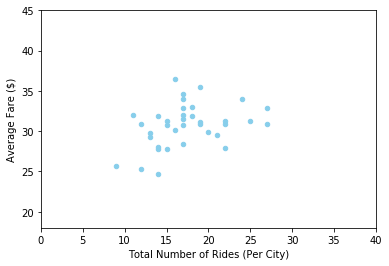

In [142]:
#graphs suburban_summary_df as a scatter plot
suburban_chart = suburban_summary_df.plot(kind='scatter', x="Total Number of Rides (Per City)", y="Average Fare ($)", c="SkyBlue")
plt.ylim(18, 45)
plt.xlim(0,40)

In [143]:
#creating graph for rural
rural_total_rides = [] #creating list for rural total rides
avg_fare_rural = [] #creating list for rural average fare
rural_city = rural_df.city.unique() #list of the rural city names (no repeats)
rural_driver_count = [] #empty list for diver total per city
area = []

for i in range(len(rural_city)):
    #using loc it runs through the rural filtered df. 
    #Checks cities against the city in rural city list. calculates the mean of the fares for given city.
    fare = rural_df.loc[rural_df["city"] == rural_city[i], "fare"].mean()
    avg_fare_rural.append(fare) #appends mean for the city to the avg_fare_rural list
    
    #Checks cities against the city in rural city list. Counts the number of times that city appears = number of total rides.
    rides = rural_df.loc[rural_df["city"] == rural_city[i], "city"].count()
    rural_total_rides.append(rides) #appends ride count for the city to the rural_total_rides list
    
    #if row matches the current city looking for returns the value in the driver_count column
    driver_count  = rural_df.loc[rural_df["city"] == rural_city[i], "driver_count"].iloc[2]
    rural_driver_count.append(driver_count) #appends driver_count to list
    
#creates dataframe of rural cities, average fare, total rides and driver counts
rural_summary_df = pd.DataFrame({"Rural Cities": rural_city, "Average Fare ($)": avg_fare_rural, 
                                 "Total Number of Rides (Per City)": rural_total_rides, "Driver Count": rural_driver_count})
rural_summary_df = rural_summary_df.round(2) #rounds the data to two decimal places
rural_summary_df.head() #prints first five lines

,Rural Cities,Average Fare ($),Total Number of Rides (Per City),Driver Count
0,Randallchester,29.74,5,9
1,North Holly,29.13,9,8
2,Michaelberg,35.00,12,6
3,Lake Latoyabury,26.06,11,2
4,Taylorhaven,42.26,6,1


(0, 40)

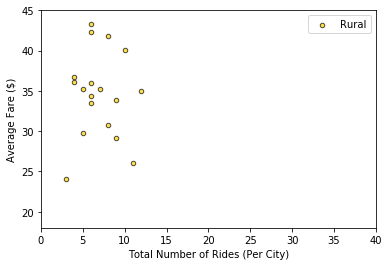

In [144]:
#prints rural data scatter plot
rural_summary_df.plot(kind='scatter', x="Total Number of Rides (Per City)", y="Average Fare ($)", c="Gold", label = "Rural", 
                      edgecolors="black", alpha=0.7)
plt.ylim(18, 45)
plt.xlim(0,40)

<function matplotlib.pyplot.show(*args, **kw)>

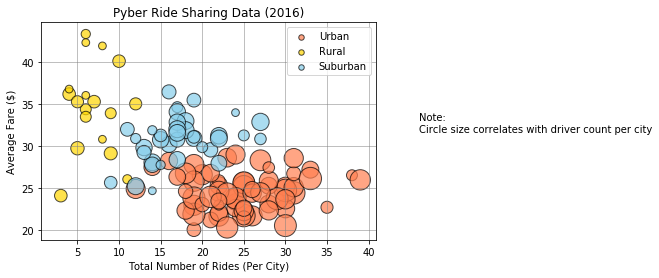

In [145]:
#creates the urban plot and adds s as the bubble size
combined_graphs = urban_summary_df.plot(kind='scatter', x="Total Number of Rides (Per City)", y="Average Fare ($)", c="Coral",
                                        label = "Urban", edgecolors="black", s= np.sqrt(urban_driver_count)*60, alpha=0.7,
                                       title="Pyber Ride Sharing Data (2016)")
#creates the rural plot and adds s as the bubble size. adds to the combined graphs sinces ax = combined_graphs
rural_summary_df.plot(kind='scatter', x="Total Number of Rides (Per City)", y="Average Fare ($)", c="Gold", label = "Rural", 
                      edgecolors="black",s = np.sqrt(rural_driver_count)*60, alpha=0.7, ax = combined_graphs)

#creates the suburban plot and adds s as the bubble size. adds to the combined graphs sinces ax = combined_graphs
suburban_summary_df.plot(kind='scatter', x="Total Number of Rides (Per City)", y="Average Fare ($)", alpha=0.7, c="SkyBlue", 
                         label = "Suburban", edgecolors="black", s= np.sqrt(suburban_driver_count)*60, ax = combined_graphs)

combined_graphs.grid(linestyle='-', linewidth='0.5', color='gray') #sets grid
plt.figtext(1, 0.5, 'Note:\nCircle size correlates with driver count per city') #sets note to side
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10) #sets legend
lgnd.legendHandles[0]._sizes = [30] #makes bubble size in legend equal to others
lgnd.legendHandles[1]._sizes = [30] #makes bubble size in legend equal to others
lgnd.legendHandles[2]._sizes = [30] #makes bubble size in legend equal to others
plt.savefig('Pictures/pyber_ride_bubble_chart.png') #saves image to pictures folder
plt.show

## Total Fares by City Type

In [146]:
urban_total_fare = urban_df.fare.sum() #finds total urban fares
suburban_total_fare = suburban_df.fare.sum() #finds total suburban fares
rural_total_fare = rural_df.fare.sum() #finds total rural fares
total_fare = urban_total_fare + suburban_total_fare + rural_total_fare #finds total fares

percent_fares_chart = [] #creates list for percent fares

percent_urban_fare = (urban_total_fare / total_fare *100).round(1) #calculates urban percent fare
percent_fares_chart.append(percent_urban_fare) #appends to percent_fares_chart list
percent_suburban_fare = (suburban_total_fare / total_fare *100).round(1) #calculates suburban percent fare
percent_fares_chart.append(percent_suburban_fare) #appends to percent_fares_chart list
percent_rural_fare = (rural_total_fare / total_fare *100).round(1) #calculates rural percent fare
percent_fares_chart.append(percent_rural_fare) #appends to percent_fares_chart list

names = ["Urban", "Suburban", "Rural"] #sets names for pie sections
explode = (0.1, 0, 0) #explodes urban piece
colors = ["Coral", "SkyBlue", "Gold"] #sets the colors

<function matplotlib.pyplot.show(*args, **kw)>

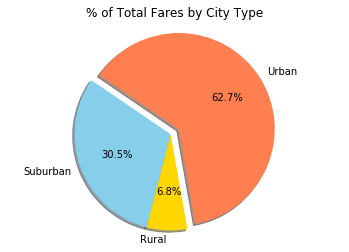

In [147]:
#graphs pie chart for fares
pie_chart_fares = plt.pie(percent_fares_chart, explode=explode, labels=names, colors=colors,
        autopct="%1.1f%%", textprops={'color':"black"}, shadow=True, startangle=280)
plt.axis("equal") #makes it a circle
plt.title("% of Total Fares by City Type") #adds title
plt.savefig('Pictures/percent_total_fares.png') #saves image to pictures folder
plt.show

## Total Rides by City Type

In [148]:
np.asarray(urban_total_rides) #converts series to a numpy array so we can sum it later
total_urban_rides = np.sum(urban_total_rides) #sums array to find total urban rides

np.asarray(suburban_total_rides) #converts series to a numpy array so we can sum it later
total_suburban_rides = np.sum(suburban_total_rides) #sums array to find total suburban rides

np.asarray(rural_total_rides) #converts series to a numpy array so we can sum it later
total_rural_rides = np.sum(rural_total_rides) #sums array to find total rural rides

total_rides = total_rural_rides + total_suburban_rides + total_urban_rides #calculates total rides

In [149]:
percent_rides_chart = [] #list will hold percents for rides

percent_urban_rides = (total_urban_rides / total_rides *100).round(1) #calculates urban percent rides
percent_rides_chart.append(percent_urban_rides) #appends to percent_rides_chart list

percent_suburban_rides = (total_suburban_rides / total_rides *100).round(1) #calculates suburban percent rides
percent_rides_chart.append(percent_suburban_rides) #appends to percent_rides_chart list

percent_rural_rides = (total_rural_rides / total_rides *100).round(1) #calculates rural percent rides
percent_rides_chart.append(percent_rural_rides) #appends to percent_rides_chart list

In [150]:
names = ["Urban", "Suburban", "Rural"] #sets names for pie sections
explode = (0.1, 0, 0) #explodes urban piece
colors = ["Coral", "SkyBlue", "Gold"] #sets the colors

<function matplotlib.pyplot.show(*args, **kw)>

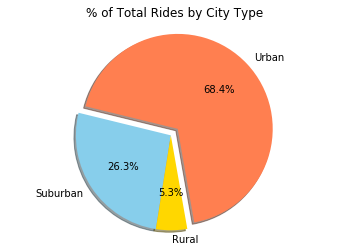

In [151]:
#graphs pie chart for rides
pie_chart_rides = plt.pie(percent_rides_chart, explode=explode, labels=names, colors=colors,
        autopct="%1.1f%%", textprops={'color':"black"}, shadow=True, startangle=280)
plt.axis("equal") #makes it a circle
plt.title("% of Total Rides by City Type") #adds title
plt.savefig('Pictures/percent_total_rides.png')  #saves image to pictures folder
plt.show

## Total Drivers by City Type

In [152]:
np.asarray(urban_driver_count) #converts series to a numpy array so we can sum it later
total_urban_drivers = np.sum(urban_driver_count) #sums array to find total urban drivers

np.asarray(suburban_driver_count) #converts series to a numpy array so we can sum it later
total_suburban_drivers = np.sum(suburban_driver_count) #sums array to find total suburban drivers

np.asarray(rural_driver_count) #converts series to a numpy array so we can sum it later
total_rural_drivers = np.sum(rural_driver_count)  #sums array to find total rural drivers

total_drivers = total_rural_drivers + total_suburban_drivers + total_urban_drivers #calculates total rides

In [153]:
percent_drivers_chart = [] #list will hold percents for drivers

percent_urban_drivers = (total_urban_drivers / total_drivers *100).round(1) #calculates urban percent drivers
percent_drivers_chart.append(percent_urban_drivers) #appends to percent_drivers_chart list

percent_suburban_drivers = (total_suburban_drivers / total_drivers *100).round(1) #calculates suburban percent drivers
percent_drivers_chart.append(percent_suburban_drivers) #appends to percent_drivers_chart list

percent_rural_drivers = (total_rural_drivers / total_drivers *100).round(1) #calculates rural percent drivers
percent_drivers_chart.append(percent_rural_drivers) #appends to percent_drivers_chart list

In [154]:
names = ["Urban", "Suburban", "Rural"] #sets names for pie sections
explode = (0.1, 0, 0) #explodes urban piece
colors = ["Coral", "SkyBlue", "Gold"] #adds title

<function matplotlib.pyplot.show(*args, **kw)>

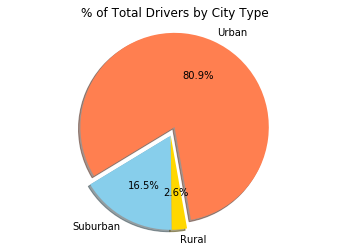

In [155]:
#graphs pie chart for drivers
pie_chart_drivers = plt.pie(percent_drivers_chart, explode=explode, labels=names, colors=colors,
        autopct="%1.1f%%", textprops={'color':"black"}, shadow=True, startangle=280)
plt.axis("equal") #makes it a circle
plt.title("% of Total Drivers by City Type") #adds title
plt.savefig('Pictures/percent_total_drivers.png') #saves image to pictures folder
plt.show

## Observations

1. The average fare for a ride is more expensive in rural areas. It is then followed by suburban and urban is the cheapest. Though the cause for this is not obvious. One factor could be the most drivers are found in urban areas (80.9%), followed by suburban (16.5%) and rural has the least (2.6%). Thus since there is a smaller supply of drivers, then the prices for rides goes up. Though another factor could be distance. We do not have any data on how far the rides were. It is likely that in rural areas the rides are going to be longer versus the urban areas it is likely shorter distances they are traveling. 

2. Urban areas has the most number of rides (68.4% of the total rides), followed by suburban rides (26.3% of the total rides), followed by rural rides (5.3% of the total rides).

3. Urban cities account for 80.9% of drivers, though only 68.4% of total rides are in urban areas. This is a large disparity. This could mean there is a need for more drivers in suburban areas and there are too many in urban. Or there could be a high number of rides that begin in urban areas and end in suburbs. I would want to know how those rides were characterized. If they were labeled at suburban because that was where they ended then that could account for this disparity. 